In [6]:
import pymedtermino
pymedtermino.LANGUAGE = "en"
pymedtermino.REMOVE_SUPPRESSED_CONCEPTS = True
from pymedtermino.all import *
from pymedtermino import *

from pymedtermino.snomedct import *
import wikipedia
import spacy
from wordcloud import WordCloud

In [7]:
sensitive_diseases=['AIDS','HIV','TB','CANCER','BIPOLAR','MENTAL-DISORDER','BRAIN TUMOR']
sensitive_drugs = ['Abacavir','Didanosine','Emtricitabine','Lamivudine','Stavudine','Tenofovir','Zidovudine','Isoniazid','Rifampicin','Pyrazinamide','Ethambutol','RisPeridone','Olanzapine','Quetiapine','ziprasidone','paliperidone','lurasidone','afinitor','avastin','bevacizumab','bicnu','carmustine','everolinus','colozapine','AC-T']

Matplotlib is building the font cache; this may take a moment.


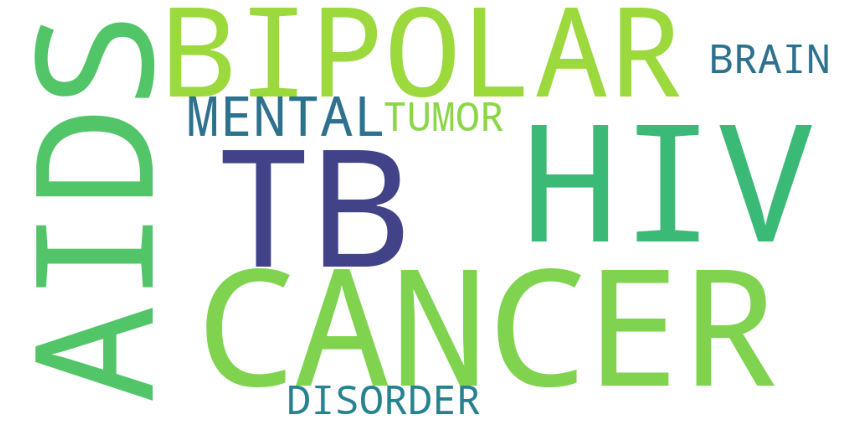

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(sensitive_diseases)
#maskArray = npy.array(Image.open("Downloads/shild.jpg"))
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

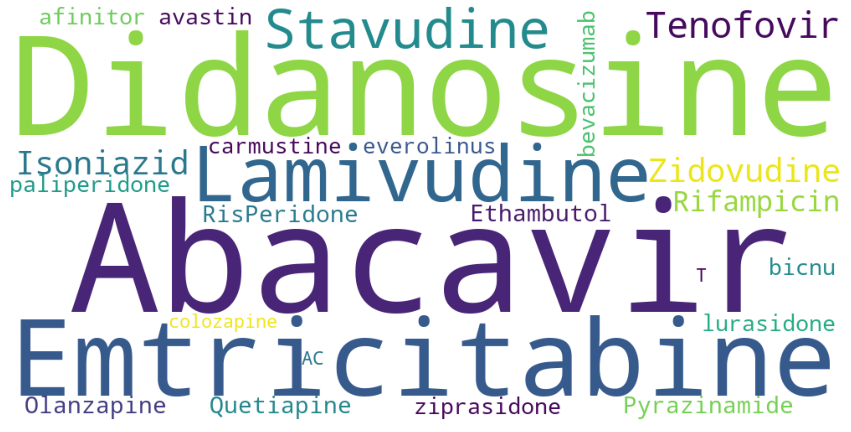

In [9]:
import matplotlib.pyplot as plt

#convert list to string and generate
unique_string=(" ").join(sensitive_drugs)
#maskArray = npy.array(Image.open("Downloads/shild.jpg"))
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [10]:
snomed_senstive_info = []
for item in sensitive_diseases:
    info = SNOMEDCT.search(item)
    snomed_senstive_info.append(info)
    
snomed_senstive_drug_info = []
for item in sensitive_drugs :
    info = SNOMEDCT.search(item)
    snomed_senstive_drug_info.append(info)

In [11]:
all_snomed_senstive_info=[]
for term in snomed_senstive_info:
    for term1 in term:
        all_snomed_senstive_info.append(term1)
#all_snomed_senstive_info     

all_snomed_senstive_drug_info=[]
for term in snomed_senstive_drug_info:
    for term1 in term:
        all_snomed_senstive_drug_info.append(term1)
all_snomed_senstive_drug_info  



[SNOMEDCT[116084008]  # Product containing abacavir (medicinal product),
 SNOMEDCT[134571004]  # Product containing abacavir and lamivudine and zidovudine (medicinal product),
 SNOMEDCT[324881002]  # Product containing precisely abacavir (as abacavir sulfate) 20 milligram/1 milliliter conventional release oral solution (clinical drug),
 SNOMEDCT[377159003]  # Product containing precisely abacavir 300 milligram and lamivudine 150 milligram and zidovudine 300 milligram/1 each conventional release oral tablet (clinical drug),
 SNOMEDCT[387005008]  # Abacavir (substance),
 SNOMEDCT[412074007]  # Abacavir sulfate (substance),
 SNOMEDCT[413381000]  # Product containing abacavir and lamivudine (medicinal product),
 SNOMEDCT[713707006]  # Allergy to abacavir (finding),
 SNOMEDCT[714224008]  # Product containing abacavir and lamivudine in oral dose form (medicinal product form),
 SNOMEDCT[714223002]  # Product containing abacavir in oral dose form (medicinal product form),
 SNOMEDCT[714769003] 

In [17]:
import re
string = ' '.join([str(elem) for elem in all_snomed_senstive_info])
#type(result1)
result1 = re.split(r"#|\n",string.lower())
#result1.group(0)
result1
result2=[]
for i in result1:
    res=re.findall(r"^ snomedct\[[0-9]+\]  |^snomedct\[[0-9]+\]  ",i)#mached snomedct word
    result2.append(res)
result2
result3=[ele for ele in result2 if ele!=[]]#remove empty list
result4=[]
for i in result3:
    for item in i:
        result4.append(item)#make ito a sinle list

result4
result5=[]
for j in result1:
    if j not in result4:
        result5.append(j.strip())
#result5
result5=' '.join([str(elem) for elem in result5])
result6=re.split(r"\(|\)", result5)
result6

result7 = re.split(r"\(|\)",string)
#result1.group(0)
result1
result8=set()
for i in result7:
    if '\n' not in i:
        result8.add(str(i).lower())

result9=[]
for i in result8:
    res=re.findall(r"^(?!snomedct*).+",i)#mached snomedct word
    result9.append(res)

result10=[]
for i in result9:
    for j in i:
        if j !=[''] and j !=' ' and j!='':
            result10.append(j)


snomed_reduced_final_res=[]
for i in result6:
    if i not in result10 and i != '':
        snomed_reduced_final_res.append(i.strip())
snomed_reduced_final_result = []
for i in snomed_reduced_final_res:
    if i != '':
        snomed_reduced_final_result.append(i.strip())
snomed_reduced_final_result        


['human immunodeficiency virus',
 'human immunodeficiency virus infection with infectious mononucleosis-like syndrome',
 'feline immunodeficiency virus',
 'acquired immune deficiency syndrome',
 'simian immunodeficiency virus',
 'human immunodeficiency virus infection with acute lymphadenitis',
 'fear of contracting human immunodeficiency virus infection',
 'human immunodeficiency virus centers for disease control and prevention category a3',
 'human immunodeficiency virus centers for disease control and prevention category b3',
 'human immunodeficiency virus centers for disease control and prevention category c1',
 'human immunodeficiency virus centers for disease control and prevention category c2',
 'human immunodeficiency virus centers for disease control and prevention category c3',
 'human immunodeficiency virus world health organization class iv',
 'bovine immunodeficiency virus',
 'audiovisual aids operator',
 'fully mobile',
 'human immunodeficiency virus antibody test',
 'not

In [18]:
import re
string = ' '.join([str(elem) for elem in all_snomed_senstive_drug_info])
#type(result1)
result1 = re.split(r"#|\n",string.lower())
#result1.group(0)
result1
result2=[]
for i in result1:
    res=re.findall(r"^ snomedct\[[0-9]+\]  |^snomedct\[[0-9]+\]  ",i)#mached snomedct word
    result2.append(res)
result2
result3=[ele for ele in result2 if ele!=[]]#remove empty list
result4=[]
for i in result3:
    for item in i:
        result4.append(item)#make ito a sinle list

result4
result5=[]
for j in result1:
    if j not in result4:
        result5.append(j.strip())
#result5
result5=' '.join([str(elem) for elem in result5])
result6=re.split(r"\(|\)", result5)
result6

result7 = re.split(r"\(|\)",string)
#result1.group(0)
result1
result8=set()
for i in result7:
    if '\n' not in i:
        result8.add(str(i).lower())

result9=[]
for i in result8:
    res=re.findall(r"^(?!snomedct*).+",i)#mached snomedct word
    result9.append(res)

result10=[]
for i in result9:
    for j in i:
        if j !=[''] and j !=' ' and j!='':
            result10.append(j)


snomed_reduced_final_drug_result=[]
for i in result6:
    if i not in result10:
        snomed_reduced_final_drug_result.append(i.strip())
snomed_reduced_final_drug_result


['product containing abacavir',
 'product containing abacavir and lamivudine and zidovudine',
 'product containing precisely abacavir',
 'product containing precisely abacavir 300 milligram and lamivudine 150 milligram and zidovudine 300 milligram/1 each conventional release oral tablet',
 'abacavir',
 'abacavir sulfate',
 'product containing abacavir and lamivudine',
 'allergy to abacavir',
 'product containing abacavir and lamivudine in oral dose form',
 'product containing abacavir in oral dose form',
 'product containing abacavir and dolutegravir and lamivudine',
 'product containing abacavir and dolutegravir and lamivudine in oral dose form',
 'product containing abacavir and lamivudine and zidovudine in oral dose form',
 'product containing only abacavir',
 'product containing only abacavir and lamivudine',
 'product containing only abacavir and dolutegravir and lamivudine',
 'product containing only abacavir and lamivudine and zidovudine',
 'product containing only abacavir in o

In [19]:
import wikipedia
wikipedia_senstive_info = []
for item in sensitive_diseases:
    info = wikipedia.search(item)
    wikipedia_senstive_info.append(info)
#wikipedia_senstive_info

wikipedia_senstive_drug_info = []
for item in sensitive_drugs:
    info = wikipedia.search(item)
    wikipedia_senstive_drug_info.append(info)
wikipedia_senstive_drug_info

[['Abacavir',
  'Abacavir/dolutegravir/lamivudine',
  'Abacavir/lamivudine',
  'Abacavir/lamivudine/zidovudine',
  'Lamivudine',
  'Guanosine',
  'ViiV Healthcare',
  'Zidovudine',
  'Schedule H',
  'Morbilliform'],
 ['Didanosine',
  'Bioretrosynthesis',
  'Allopurinol',
  'Emtricitabine/tenofovir',
  'DDI',
  'Bristol Myers Squibb',
  'Fanconi syndrome',
  'Reverse-transcriptase inhibitor',
  'Tenofovir disoproxil',
  'Ciprofloxacin'],
 ['Emtricitabine',
  'Emtricitabine/tenofovir',
  'Tenofovir alafenamide',
  'Bictegravir/emtricitabine/tenofovir alafenamide',
  'Efavirenz/emtricitabine/tenofovir',
  'Tenofovir disoproxil',
  'Elvitegravir/cobicistat/emtricitabine/tenofovir',
  'Bictegravir',
  'Pre-exposure prophylaxis',
  'ATC code J05'],
 ['Lamivudine',
  'Lamivudine/zidovudine',
  'Dolutegravir/lamivudine/tenofovir',
  'Abacavir/lamivudine',
  'Dolutegravir/lamivudine',
  'Efavirenz/lamivudine/tenofovir',
  'Lamivudine/raltegravir',
  'Abacavir/dolutegravir/lamivudine',
  'WHO Mo

In [20]:
all_wikipedia_senstive_info=[]
for term in wikipedia_senstive_info:
    for term1 in term:
        all_wikipedia_senstive_info.append(term1)
all_wikipedia_senstive_info
for i in range(len(all_wikipedia_senstive_info)):
    all_wikipedia_senstive_info[i] = all_wikipedia_senstive_info[i].lower()

#all_wikipedia_senstive_info

all_wikipedia_senstive_drug_info=[]
for term in wikipedia_senstive_drug_info:
    for term1 in term:
        all_wikipedia_senstive_drug_info.append(term1)
all_wikipedia_senstive_drug_info
for i in range(len(all_wikipedia_senstive_drug_info)):
    all_wikipedia_senstive_drug_info[i] = all_wikipedia_senstive_drug_info[i].lower()

all_wikipedia_senstive_drug_info

['abacavir',
 'abacavir/dolutegravir/lamivudine',
 'abacavir/lamivudine',
 'abacavir/lamivudine/zidovudine',
 'lamivudine',
 'guanosine',
 'viiv healthcare',
 'zidovudine',
 'schedule h',
 'morbilliform',
 'didanosine',
 'bioretrosynthesis',
 'allopurinol',
 'emtricitabine/tenofovir',
 'ddi',
 'bristol myers squibb',
 'fanconi syndrome',
 'reverse-transcriptase inhibitor',
 'tenofovir disoproxil',
 'ciprofloxacin',
 'emtricitabine',
 'emtricitabine/tenofovir',
 'tenofovir alafenamide',
 'bictegravir/emtricitabine/tenofovir alafenamide',
 'efavirenz/emtricitabine/tenofovir',
 'tenofovir disoproxil',
 'elvitegravir/cobicistat/emtricitabine/tenofovir',
 'bictegravir',
 'pre-exposure prophylaxis',
 'atc code j05',
 'lamivudine',
 'lamivudine/zidovudine',
 'dolutegravir/lamivudine/tenofovir',
 'abacavir/lamivudine',
 'dolutegravir/lamivudine',
 'efavirenz/lamivudine/tenofovir',
 'lamivudine/raltegravir',
 'abacavir/dolutegravir/lamivudine',
 'who model list of essential medicines',
 'lamivu

In [21]:
final_sensitive_info_list = all_wikipedia_senstive_info + snomed_reduced_final_result
final_drug_list = all_wikipedia_senstive_drug_info + snomed_reduced_final_drug_result


In [22]:
final_sensitive_list = final_sensitive_info_list + final_drug_list


In [23]:
len(final_sensitive_list)

2516

In [ ]:
%%time
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

class Preprocess:
    def __int__(self):
        pass

    def autospell(self,text):
       
        #correct the spelling of the word.
       
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

    def to_lower(self,text):
        
       # :param text:
        #:return:
         #   Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        
        return text.lower()

    def remove_numbers(self,text):
        
        #take string input and return a clean text without numbers.
       # Use regex to discard the numbers.
        
        output = ''.join(c for c in text if not c.isdigit())
        return output

    def remove_punct(self,text):
      
        #take string input and clean string without punctuations.
        #use regex to remove the punctuations.
       
        return ''.join(c for c in text if c not in punctuation)

    def remove_Tags(self,text):
        
        #take string input and clean string without tags.
        #use regex to remove the html tags.
        
        cleaned_text = re.sub('<[^<]+?>', '', text)
        return cleaned_text

    def sentence_tokenize(self,text):
       
        #take string input and return list of sentences.
       # use nltk.sent_tokenize() to split the sentences.
        
        sent_list = []
        for w in nltk.sent_tokenize(text):
            sent_list.append(w)
        return sent_list

    def word_tokenize(self,text):
        
        #:param text:
        #:return: list of words
       
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

    def remove_stopwords(self,sentence):
    
        #removes all the stop words like "is,the,a, etc."
      
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

    def stem(self,text):
       
        #:param word_tokens:
        #:return: list of words
        
        stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(stemmed_word)

    def lemmatize(self,text):
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(lemmatized_word)


    def preprocess(self,text):
        lower_text = self.to_lower(text)
        sentence_tokens = self.sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = self.lemmatize(each_sent)
            clean_text = self.remove_numbers(lemmatizzed_sent)
            clean_text = self.remove_punct(clean_text)
            clean_text = self.remove_Tags(clean_text)
            clean_text = self.remove_stopwords(clean_text)
            word_tokens = self.word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list


In [2]:
%%time
file = open("snomed.txt",'r')
final_sensitive_list = []

for line in file:
    strip_line = line.strip()
    final_sensitive_list.append(strip_line)
file.close()
final_sensitive_list

CPU times: user 0 ns, sys: 1.97 ms, total: 1.97 ms
Wall time: 1.5 ms


['hiv/aids',
 'epidemiology of hiv/aids',
 'timeline of hiv/aids',
 'hiv/aids in the united states',
 'aids (disambiguation)',
 'list of countries by hiv/aids adult prevalence rate',
 'hiv/aids in africa',
 'hiv/aids denialism',
 'aids (computer virus)',
 'hiv/aids research',
 'hiv',
 'hiv/aids',
 'epidemiology of hiv/aids',
 'subtypes of hiv',
 'history of hiv/aids',
 'hiv (disambiguation)',
 'diagnosis of hiv/aids',
 'list of countries by hiv/aids adult prevalence rate',
 'hiv/aids in africa',
 'management of hiv/aids',
 'tb',
 'tuberculosis',
 'tampa bay rays',
 'terabyte',
 'socata tb family',
 'multi-drug-resistant tuberculosis',
 'tuberculosis radiology',
 'tuberculosis in india',
 'directly observed treatment, short-course',
 'tb alert',
 'cancer',
 'breast cancer',
 'colorectal cancer',
 'lung cancer',
 'pancreatic cancer',
 'not cancer',
 'cancer (astrology)',
 'prostate cancer',
 'esophageal cancer',
 'stomach cancer',
 'bipolar disorder',
 'bipolar',
 'bipolar ii disorder',


In [3]:
%%time
import tkinter as tk

import pandas as pd
import pickle
import spacy

from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector

import en_ner_bc5cdr_md
import en_ner_bionlp13cg_md
import pdfkit 
from IPython.core.display import HTML


CPU times: user 1.2 s, sys: 137 ms, total: 1.34 s
Wall time: 5.61 s


In [4]:
%%time
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

class Preprocess:
    def __int__(self):
        pass

    def autospell(self,text):
       
        #correct the spelling of the word.
       
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

    def to_lower(self,text):
        
       # :param text:
        #:return:
         #   Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        
        return text.lower()

    def remove_numbers(self,text):
        
        #take string input and return a clean text without numbers.
       # Use regex to discard the numbers.
        
        output = ''.join(c for c in text if not c.isdigit())
        return output

    def remove_punct(self,text):
      
        #take string input and clean string without punctuations.
        #use regex to remove the punctuations.
       
        return ''.join(c for c in text if c not in punctuation)

    def remove_Tags(self,text):
        
        #take string input and clean string without tags.
        #use regex to remove the html tags.
        
        cleaned_text = re.sub('<[^<]+?>', '', text)
        return cleaned_text

    def sentence_tokenize(self,text):
       
        #take string input and return list of sentences.
       # use nltk.sent_tokenize() to split the sentences.
        
        sent_list = []
        for w in nltk.sent_tokenize(text):
            sent_list.append(w)
        return sent_list

    def word_tokenize(self,text):
        
        #:param text:
        #:return: list of words
       
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

    def remove_stopwords(self,sentence):
    
        #removes all the stop words like "is,the,a, etc."
      
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

    def stem(self,text):
       
        #:param word_tokens:
        #:return: list of words
        
        stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(stemmed_word)

    def lemmatize(self,text):
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(lemmatized_word)


    def preprocess(self,text):
        lower_text = self.to_lower(text)
        sentence_tokens = self.sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = self.lemmatize(each_sent)
            clean_text = self.remove_numbers(lemmatizzed_sent)
            clean_text = self.remove_punct(clean_text)
            clean_text = self.remove_Tags(clean_text)
            clean_text = self.remove_stopwords(clean_text)
            word_tokens = self.word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

CPU times: user 0 ns, sys: 201 µs, total: 201 µs
Wall time: 214 µs


In [5]:
%%time
import re
import datefinder as df
import datetime as dt

#function to find the range of age
def range_age(s):
        ag=s
        i=1
        j=10
        x=''
        while i<j and j<150:
            if ag in range(i,j+1):
                x='['+str(i)+'-'+str(j)+']'
                return x
           
            i+=10
            j+=10
    

#main function to extract and replace
def Generalization(file):
    s1=re.findall(r'(?:\d{1,2}[a-z]* )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:\d{1,2}[a-z]*, )?\d{4}',file)
    s=re.findall(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}',file)
     #replace date
    for i in range(len(s)):
        file=file.replace(s[i],'[DATE]')
    if len(s1)>0:
       for i in range(len(s1)):
         file=file.replace(s1[i],'[DATE]') 
    
    #extract and replace Record Number
    r=file.split()
    file=file.replace(r[1],'#####')
    
    #extract and replace patient and doctor name
    name=re.findall(r'Mr\. \w[A-Za-z]+|Mrs\. \w[A-Za-z]+',file)
    for i in range(len(name)):
        file=file.replace(name[i],'[PERSON]')
    
    name=re.findall(r'DR\. \w[A-Za-z]+|Mrs\. \w[A-Za-z]+',file)
    for i in range(len(name)):
        file=file.replace(name[i],'[DOCTOR]')
        
    #extract and replace Phone number
    phno=re.findall(r'\d{3}[-\s]+\d{3}[-\s]+\d{4}',file)
    for i in range(len(phno)):
        file=file.replace(phno[i],'[PHONE NUMBER]')
    
    #extract age
    age=re.findall(r'[0-9]+[-\s]year[-\s]|[0-9]+[-\s]years[-\s]',file)
    for i in range(len(age)):
        a=str(age[i])
        a1=list(a)
        age_years="".join(a1[0:2])
        dob=range_age(float(age_years))
        file=file.replace(age[i],dob+'years')
    
    #extract and remove unwanted data
    i=2
    while(r[i]!='Admission'):
        file=file.replace(r[i],'*',1)
        i+=1
        
    #extract and replace dictated fields and attending fields
    d=re.findall(r'Dictated By:\s[A-Za-z]*\s.*| Dictated By:\s[A-Za-z]*\s.',file)
    for i in range(len(d)):
        file=file.replace(d[0],'Dictated By: [DOCTORS]')
        
    a=re.findall(r'Attending:\s[A-Za-z]*\s.*| ATTENDING:\s[A-Za-z]*\s.*',file)
    for i in range(len(a)):
        file=file.replace(a[0],'Attending: [PERSONS] ')
        
    a1=re.findall(r'ATTENDING:\s[A-Za-z]*\s.*',file)
    for i in range(len(a1)):
        file=file.replace(a1[0],'ATTENDING: [PERSONS] ')
    
    e=re.findall(r'ENTERED BY:\s[A-Za-z]*\s.*',file)
    for i in range(len(e)):
        file=file.replace(e[0],'ENTERED BY: [PERSONS] ')
    
    id=re.findall(r'Dictation ID\s.*',file)
    for i in range (len(id)):
        file=file.replace(id[i],'Dictation ID: ********')
        
    #extract and replace Batch and Index Number
    batch=re.findall(r'Batch:\s[0-9]+\sIndex No\.[-\s][A-Za-z0-9]+',file)
    for i in range(len(batch)):
        file=file.replace(batch[i],'batch:''****'+'\tIndex No.'' *********')
  
    return(file)

f=open(r"finaldocuments/6637",'r')
file=f.read()

General_data=Generalization(file)#the modified data is stored in General data....
print(General_data) 

RECORD #####
* * * * * * * * * * * * * * * * * * * * * * Admission Date: [DATE] Report Status: Signed
Discharge Date: [DATE]
ATTENDING: [PERSONS] 
CODE STATUS: Full code.
The patient was admitted to the Renal Transplant PA Service.
ADMITTING DIAGNOSES:
1. Acute renal failure.
2. Congestive heart failure.
3. End-stage renal disease , status post renal transplant.
PRINCIPAL DISCHARGE DIAGNOSES:
1. Acute renal failure requiring dialysis initiation.
2. CHF -improved.
3. End-stage renal disease , status post failed renal transplant.
OTHER DIAGNOSES AND CONDITIONS AFFECTING TREATMENT OR STAY:
Hypertension , congestive heart failure , chronic renal
dysfunction , renal transplant , CVA and pulmonary hypertension.
OPERATIONS AND PROCEDURE: Not applicable.
OTHER TREATMENTS AND PROCEDURES: Initiation of dialysis , IV
diuretics.
BRIEF SUMMARY OF HOSPITAL COURSE:
CHIEF COMPLAINT: Shortness of breath.
HISTORY OF PRESENT ILLNESS: [PERSON] is a [51-60]yearsold male
with history of end-stage renal dise

In [6]:
%%time
import re
import datefinder as df
import datetime as dt
#import time
#function to replace age as bin_avg of age
def bin_avg(s):
    ag=s
    i=1
    j=10
    while i<j and j<150:
        if ag in range(i,j+1):
            return str((i+j)/2)
           
        i+=10
        j+=10

#main function to extract and replace
def sanitization(file):
    #extract date
    s1=re.findall(r'(?:\d{1,2}[a-z]* )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:\d{1,2}[a-z]*, )?\d{4}',file)
    s=re.findall(r'\d{1,2}[/]\d{1,2}[/]\d{2}\s|\d{1,2}[/]\d{1,2}[/]\d{4}',file)
    mon=re.findall(r'(?:\d{1,2} of )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*',file)
    #print(s1)
    #print(s)
    #print(mon)
    month=['4/30','6/30','9/30','11/30']
    month1=['4/31','6/31','9/31','11/31']
    #replace date
    for i in range(len(s)):
        y="".join(s[i])
        y_1=y
        for i in range(len(month)):
            if month[i] in y:
                y=y.replace(month[i],'5/30')
        y=y.replace('0/','1/')
        for i in range(len(month1)):
            if month1[i] in y:
                y=y.replace(month1[i],'5/30')
        mat=list(df.find_dates(y))
        rep=str(dt.datetime.date(mat[0]).year)
        rep='['+rep+']'
        file=file.replace(y_1,rep)
    if len(s1)>0:    
        for i in range(len(s1)):
            y1="".join(s1[i])
            mat1=list(df.find_dates(s1[i]))
            #print(mat)
            rep1=str(dt.datetime.date(mat1[0]).year)
            rep1='['+rep1+']'
            file=file.replace(y1,rep1)
    if len(mon)>0:
        for i in range(len(mon)):
            file=file.replace(mon[i],"[MONTH] ")
   
    #extract and replace Record Number
    r=file.split()
    file=file.replace(r[1],'#####')
    
    #extract and replace patient and doctor name
    name=re.findall(r'Mr\. \w[A-Za-z]+|Mrs\. \w[A-Za-z]+|Ms\. \w[A-Za-z]+',file)
    #print(name)
    for i in range(len(name)):
        file=file.replace(name[i],"[PERSON]")
    doctor=re.findall(r'Dr\.\s\w[A-Za-z]+|DR\.\s\w[A-Za-z]+|Dr\.\s\w[A-Za-z]+[A-Z][a-z]*',file)
    #print(doctor)
    for i in range(len(doctor)):
        file=file.replace(doctor[i],"[DOCTOR]")
    
    #extract and remove unwanted data
    i=2
    while(r[i]!='Admission'):
        #print(r[i])
        file=file.replace(r[i],'*',1)
        i+=1
    #extract and replce Hospital name
    hosp=re.findall(r'[A-Za-z]* Hospital|[A-Za-z]* Hospital [A-Za-z]*',file)
    for i in range(len(hosp)):
        file=file.replace(hosp[i],"[HOSPITAL]")
    
    #extract and replace dictated fields and attending fields
    d=re.findall(r'Dictated By:\s[A-Za-z]*\s.*|DICTATED By:\s[A-Za-z]*\s.*',file)
    #print(d)
    for i in range(len(d)):
        file=file.replace(d[i],'Dictated By: [DOCTORS]')
    a=re.findall(r'Attending:\s[A-Za-z]*\s.*|ATTENDING:\s[A-Za-z]*\s.*|ENTERED BY:\s[A-Za-z]*\s.*',file)
    #print(a)
    for i in range(len(a)):
        file=file.replace(a[i],'Attending: [PERSONS]')


    id=re.findall(r'Dictation ID\s.*',file)
    for i in range(len(id)):
        file=file.replace(id[i],'Dictation ID ********')
    
    #extract age
    age=re.findall(r'[0-9]+[-\s]year[-\s]|[0-9]+[-\s]years[-\s]',file)
    #print(age)
    for i in range(len(age)):
        a=str(age[i])
        a1=list(age[i])
        age_years="".join(a1[0:2])
        dob=bin_avg(float(age_years))
        years='['+dob+']'
        file=file.replace(age[i],years+' years ')
        
    #extract and replace Phone number
    phno=re.findall(r'\d{3}[-\s]+\d{3}[-\s]+\d{4}',file)
    #print(phno)
    for i in range(len(phno)):
        file=file.replace(phno[i],"[PHONE NUMBER]")
        
    #extract and replace Batch and Index Number
    batch=re.findall(r'Batch:\s[0-9]+\sIndex No\.[-\s][A-Za-z0-9]+',file)
    #print(batch)
    for i in range(len(batch)):
        file=file.replace(batch[i],'Batch:******\tIndex No. *****')
    
    #extract and replace eScription document
    doc=re.findall(r'eScription document:\s.*',file)
    for i in range(len(doc)):
        file=file.replace(doc[i],"eScription document: ******")
   
    return(file)

#read and write the file 
f=open(r"finaldocuments/741398",'r')
file=f.read()
#st=time.time()
#call the sanitization function
synthetic_data=sanitization(file)#the modified data is stored in synthetic data....
#end=time.time()
#print("Time taken:",end-st)
print(synthetic_data)    

RECORD #####
* * * * * * * * * * * * * * * * * * * * Admission Date: [1995] Report Status: Signed
Discharge Date: [1995]
PRINCIPAL DIAGNOSIS: DEEP VENOUS THROMBOSIS
SECONDARY DIAGNOSIS: HEREDITARY ANGIOEDEMA
HISTORY OF PRESENT ILLNESS: This is a [75.5] years old white female with
hereditary angioedema with recent
abdominal surgery presents with 30 hours of severe abdominal pain
and tightness , typical of her hereditary angioedema attacks. The
patient has had HAE since childhood and recalls having a ring cut
off her finger as a child during an attack. She has had three
tracheostomies , the last one over [15.5] years ago for laryngeal edema.
Symptoms include throat tightness , difficulty talking and
swallowing and abdominal pain. She often has attacks at local
trauma sites. Over the past several years she has received Human
C1 esterase inhibitor as part of a study conducted at CTMC by [DOCTOR] Gendusa She has done very well with these treatments for acute
attacks until recently when she 

In [7]:

def summarization(filename):
    text=''
    with open(filename,"r") as a_file:
        for line in a_file:
            stripped_line = line.replace("\n"," ")
            text+=stripped_line
    def content(pattern):
    #pattern='PRINCIPAL DIAGNOSIS:(.*?)(:)'
        principal_diagnosis = re.search(pattern,text).group(0)
#print(res)
#Identifying the last label
        result = re.search('[ a-zA-Z]+\:$',principal_diagnosis).group(0)
#res1
#splitting each sentence based on full stop
        result_1=principal_diagnosis.split(".")
#result_1
#creating a list having only principal diagnosis
        text_list=[]
        for i in result_1:
            if i != result:
                text_list.append(i)
#text_list
        final_result = '.'.join(text_list)
        final= final_result+'.'
        return final
    
    
    from IPython.display import Markdown, display
    def printmd(string):
        display(Markdown(string))
        
    import re
    d1 = re.findall(r"Admission Date: [\d]{1,2}/[\d]{1,2}/[\d]{2,4}", text)
    for s in d1:
        printmd(s)
    d2 = re.findall(r"Discharge Date: [\d]{1,2}/[\d]{1,2}/[\d]{2,4}", text)
    for s in d2:
        printmd(s) 
    p_d=""
    h_p_i=""
    p_m_h=""
    m_o_a=""
    allergies=""
    p_e_a=""
    if 'PRINCIPAL DIAGNOSIS ON DISCHARGE:' in text:
        p_d = 'PRINCIPAL DIAGNOSIS ON DISCHARGE:(.*?)([a-bA-Z]:)'
        p_d = content(p_d)
    if 'HISTORY OF PRESENT ILLNESS:' in text:
        h_p_i='HISTORY OF PRESENT ILLNESS:(.*?)([a-bA-Z]:)'
        h_p_i=content(h_p_i)
    if 'PAST MEDICAL HISTORY:' in text:
        p_m_h='PAST MEDICAL HISTORY:(.*?)([a-bA-Z]:)'
        p_m_h=content(p_m_h)
    if 'MEDICATIONS ON ADMISSION:' in text:
        m_o_a='MEDICATIONS ON ADMISSION:(.*?)([a-bA-Z]:)'
        m_o_a=content(m_o_a)
    if 'ALLERGIES' in text:
        allergies='ALLERGIES:(.*?)([a-bA-Z]:)'
        allergies=content(allergies)
    if 'PHYSICAL EXAMINATION ON ADMISSION:' in text:
        p_e_a='PHYSICAL EXAMINATION ON ADMISSION:(.*?)([a-bA-Z]:)'
        p_e_a=content(p_e_a)
    res = str(d1)+"\n"+str(d2)+"\n"+p_d+"\n"+h_p_i+"\n"+p_m_h+"\n"+m_o_a+"\n"+allergies+"\n"+p_e_a
    res1 = res.split('\n')
    with open('summerization.txt',"w") as f:
        for lis in res1:
            
            if lis != "":
                f.write('%s\n'%lis)
    return res1

In [8]:
nlp_bc = en_ner_bc5cdr_md.load()
nlp_bi = en_ner_bionlp13cg_md.load()

In [9]:
%%time
def check_sensitive(file):
        f=open(file)
        y=f.read()

        pr = Preprocess()
        res=pr.preprocess(y)
        y=" ".join(res)
        
       
        doc_bio = nlp_bi(y)
        doc_bc = nlp_bc(y)
    
        doc_bc_list = [item for i in doc_bc.ents for item in i]
    
    #spacy.displacy.render(doc, style='ent', jupyter=True)
        doc_list_bc = [item for i in doc_bio.ents for item in i]
    
        sen_list =  doc_bc_list+doc_list_bc#doc_med7_list 
        sensitive = False
        sen=[]
        for item in sen_list:
            term1 =  str(item)
            if  term1 in final_sensitive_list:
                sensitive=True
                sen.append(term1)
                
            
        if sensitive is True:
            
            return True
        else:
            return False
    

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [11]:
%%time
from flask import *  
import spacy



app = Flask(__name__)  
#app.secret_key ="abc"
app.config['CLIENT_PDF'] = 'static/files'

@app.route('/')  
def upload():  
    return render_template("file_upload_form.html")  
 
@app.route('/anonimization', methods=['POST'])
def analymaization():
    if request.method == 'POST':
        if request.form.get('Generalization') == 'Generalization':
            print("Generalization")
            f=open(file_nam,'r')
            file1=f.read()
            generalige = Generalization(file1)
            generalige = generalige.split('\n')
            
            with open('static/files/generalization.txt',"w") as f:
                for lis in generalige:
                    f.write('%s\n'%lis)
                    
            summarize = summarization('static/files/generalization.txt')
            doc = ' '.join([str(elem+'\n') for elem in summarize])
            doc =nlp_bc(doc)
            html =  displacy.render(doc, style='ent', page=True,jupyter = False)
            with open("output.html", 'w+', encoding="utf-8") as fp:
                fp.write(html)
            final_output_file_path = 'static/files/'+fname+'_sen.pdf'
            pdfkit.from_file('output.html', final_output_file_path) 
            fp.close()
            
                        
            return render_template("download_sen.html",name = file_nam)
      
        elif  request.form.get('Sanitization') == 'Sanitization':
            print("Sanitization")
            f=open(file_nam,'r')
            file1=f.read()
            sanitize = sanitization(file1)
            sanitize = sanitize.split('\n')
            
            with open('static/files/sanitization.txt',"w") as f:
                for lis in sanitize:
                    f.write('%s\n'%lis)
                    
            summarize = summarization('static/files/sanitization.txt')
            doc = ' '.join([str(elem+'\n') for elem in summarize ])
            doc =nlp_bc(doc)
            html =  displacy.render(doc, style='ent', page=True,jupyter = False)
            with open("output.html", 'w+', encoding="utf-8") as fp:
                fp.write(html)
            final_output_file_path = 'static/files/'+fname+'_sen.pdf'
            pdfkit.from_file('output.html', final_output_file_path) 
            fp.close()
            
                        
            return render_template("download_sen.html",name = file_nam)
    return render_template("ananimization.html")
      
@app.route('/success', methods = ['POST'])  
def success():  
    if request.method == 'POST':  
        f = request.files['file']  
        #file = f.filename+str(f) 
        print('file uploaded successfully')
        global fname
        fname = str(f.filename)
        global file_nam
        file_nam = "finaldocuments/"+fname
        #session['file_name']=file
        global res
        res = check_sensitive(file_nam)
        if res == True:
            return render_template("ananimization.html", name = file_nam)
        else:
            res = summarization(file_nam)
            doc = ' '.join([str(elem+'\n') for elem in res])
            doc =nlp_bc(doc)
            html =  displacy.render(doc, style='ent', page=True,jupyter = False)
            with open("output.html", 'w+', encoding="utf-8") as fp:
                fp.write(html)
            final_output_file_path = 'static/files/'+fname+'_nonsen.pdf'
            pdfkit.from_file('output.html', final_output_file_path) 
            fp.close()
            #print('mohith')
            return render_template("download_nonsen.html",name = file_nam)  
  
@app.route('/return-sen_files')
def return_files_tut():
    
        file_path = fname+'_sen.pdf'
        
        return send_from_directory(app.config['CLIENT_PDF'],filename= file_path,as_attachment=True,cache_timeout=0)

@app.route('/return-nonsen_file')
def return_files_tut1():
    
        file_path = fname+'_nonsen.pdf'
        #print(file_path)
        return send_from_directory(app.config['CLIENT_PDF'],filename= file_path,as_attachment=True,cache_timeout=0)
    
if __name__ == '__main__':  
    app.run(debug = True, port="5001" , use_reloader=False)
      
del file_nam
del fname


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)


NameError: name 'file_nam' is not defined

In [13]:
import pymedtermino.snomedct

OSError: Database /home/likhith/anaconda3/lib/python3.8/site-packages/pymedtermino/snomedct.sqlite3 not available. Please build, or set pymedtermino.DATA_DIR correctly

In [14]:
import sys
sys.path

['/home/likhith/finalyearprojectwork-main',
 '/home/likhith/anaconda3/lib/python38.zip',
 '/home/likhith/anaconda3/lib/python3.8',
 '/home/likhith/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/likhith/anaconda3/lib/python3.8/site-packages',
 '/home/likhith/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/likhith/.ipython']

In [1]:
import pymedtermino.snomedct
